In [1]:
import sys
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

In [3]:
from pennylane import numpy as np
import pennylane as qml

# Data

In [4]:

file_path = '../data/energies/Trial/Strings_Energies.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/1000
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

In [5]:
X, Y = angles_list, score_list

# Model

## Define

In [6]:
circuit_layers = \
    [layers.angle_preparation()] + \
    [layers.rotationX_layer(), layers.rotationZ_layer(), layers.rotationZZ_layer()] * 50 +  \
    [layers.ancillas(n_ancillas=1)] + \
    [layers.mesurament(qubits='ancillas')] 

In [7]:

SCORE_PREDICTOR = m.model(
    n_qubits_data = 12, 
    circuit_layers = circuit_layers
)

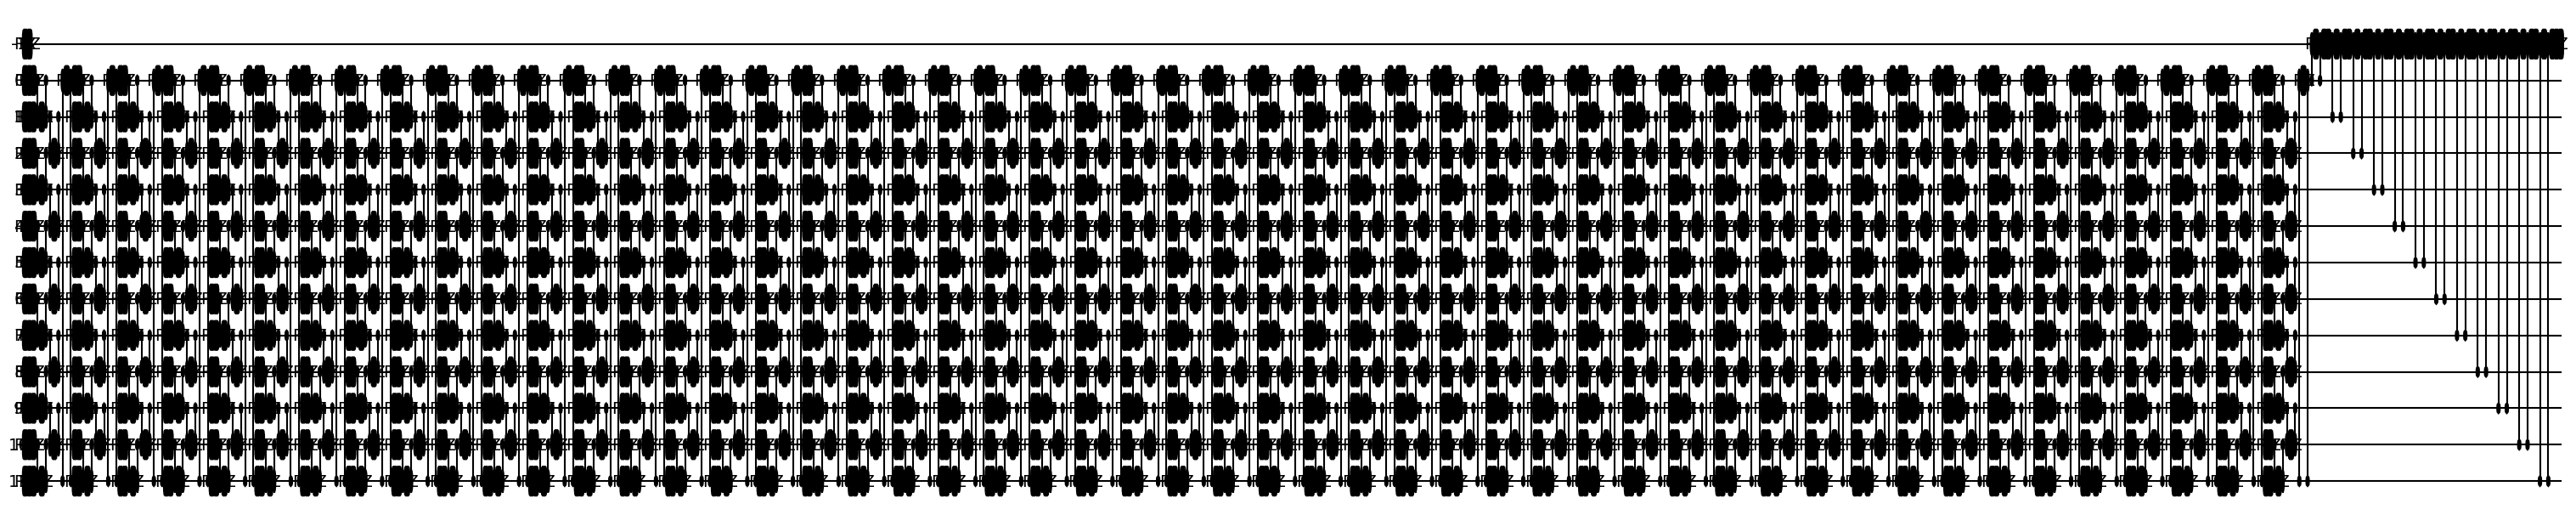

In [8]:
SCORE_PREDICTOR.draw_circuit(size=(30, 6))

## Train

In [9]:
SCORE_PREDICTOR.set_data(    
    data_X = X, 
    data_Y = Y, 
    # data_validation = data_validation
)

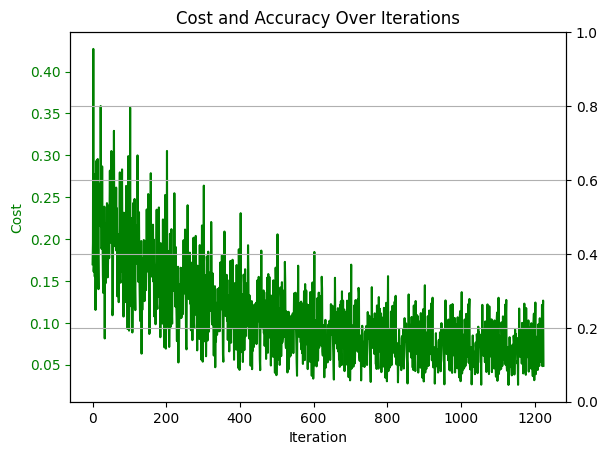

Epoch: 12 | Iter:    25 | Cost: 0.0487989 | Accuracy: 0.9512011 
Epoch: 12 | Iter:    26 | Cost: 0.0416511 | Accuracy: 0.9583489 


KeyboardInterrupt: 

In [10]:
SCORE_PREDICTOR.train(
    epochs = 15,     
    batch_size = 10,
    optimizer = qml.SPSAOptimizer(maxiter=100000, c=0.15, a=0.2),
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 5
    }
)

## Try

In [11]:
# take 20 items from the data set randomly

import random
random.seed(42)
random_index = random.sample(range(0, len(X)), 20)
X_test = X[random_index]
Y_test = Y[random_index]

# predict the score for the 20 items
Y_predicted = [SCORE_PREDICTOR.predict(x) for x in X_test]

In [12]:
# print the results
for i in range(len(X_test)):
    print("String: {} \tScore: {:.3f} \tPredicted: {:.3f} \tDiference: {:.3f}".format(i, Y_test[i].item(), Y_predicted[i].item(), abs(Y_test[i].item() - Y_predicted[i].item())))

String: 0 	Score: 0.300 	Predicted: 0.343 	Diference: 0.043
String: 1 	Score: 0.667 	Predicted: 0.365 	Diference: 0.302
String: 2 	Score: 0.244 	Predicted: 0.359 	Diference: 0.114
String: 3 	Score: 0.514 	Predicted: 0.352 	Diference: 0.161
String: 4 	Score: 0.006 	Predicted: 0.352 	Diference: 0.347
String: 5 	Score: 0.772 	Predicted: 0.354 	Diference: 0.418
String: 6 	Score: 0.316 	Predicted: 0.339 	Diference: 0.023
String: 7 	Score: 0.581 	Predicted: 0.342 	Diference: 0.239
String: 8 	Score: 0.475 	Predicted: 0.352 	Diference: 0.123
String: 9 	Score: 0.404 	Predicted: 0.345 	Diference: 0.059
String: 10 	Score: 0.587 	Predicted: 0.358 	Diference: 0.229
String: 11 	Score: 0.331 	Predicted: 0.352 	Diference: 0.021
String: 12 	Score: 0.677 	Predicted: 0.361 	Diference: 0.316
String: 13 	Score: 0.153 	Predicted: 0.345 	Diference: 0.191
String: 14 	Score: 0.270 	Predicted: 0.363 	Diference: 0.093
String: 15 	Score: 0.119 	Predicted: 0.347 	Diference: 0.228
String: 16 	Score: 0.449 	Predicte

# Model 2

## Define

In [6]:
circuit_layers_2 = \
    [layers.angle_preparation(qubits='all_but_first')] + \
    [layers.rotationX_layer(), layers.rotationZ_layer(), layers.rotationZZ_layer()] * 50 +  \
    [layers.mesurament(qubits=[1])] 

In [15]:

SCORE_PREDICTOR_2 = m.model(
    n_qubits_data = 13, 
    circuit_layers = circuit_layers_2
)

0


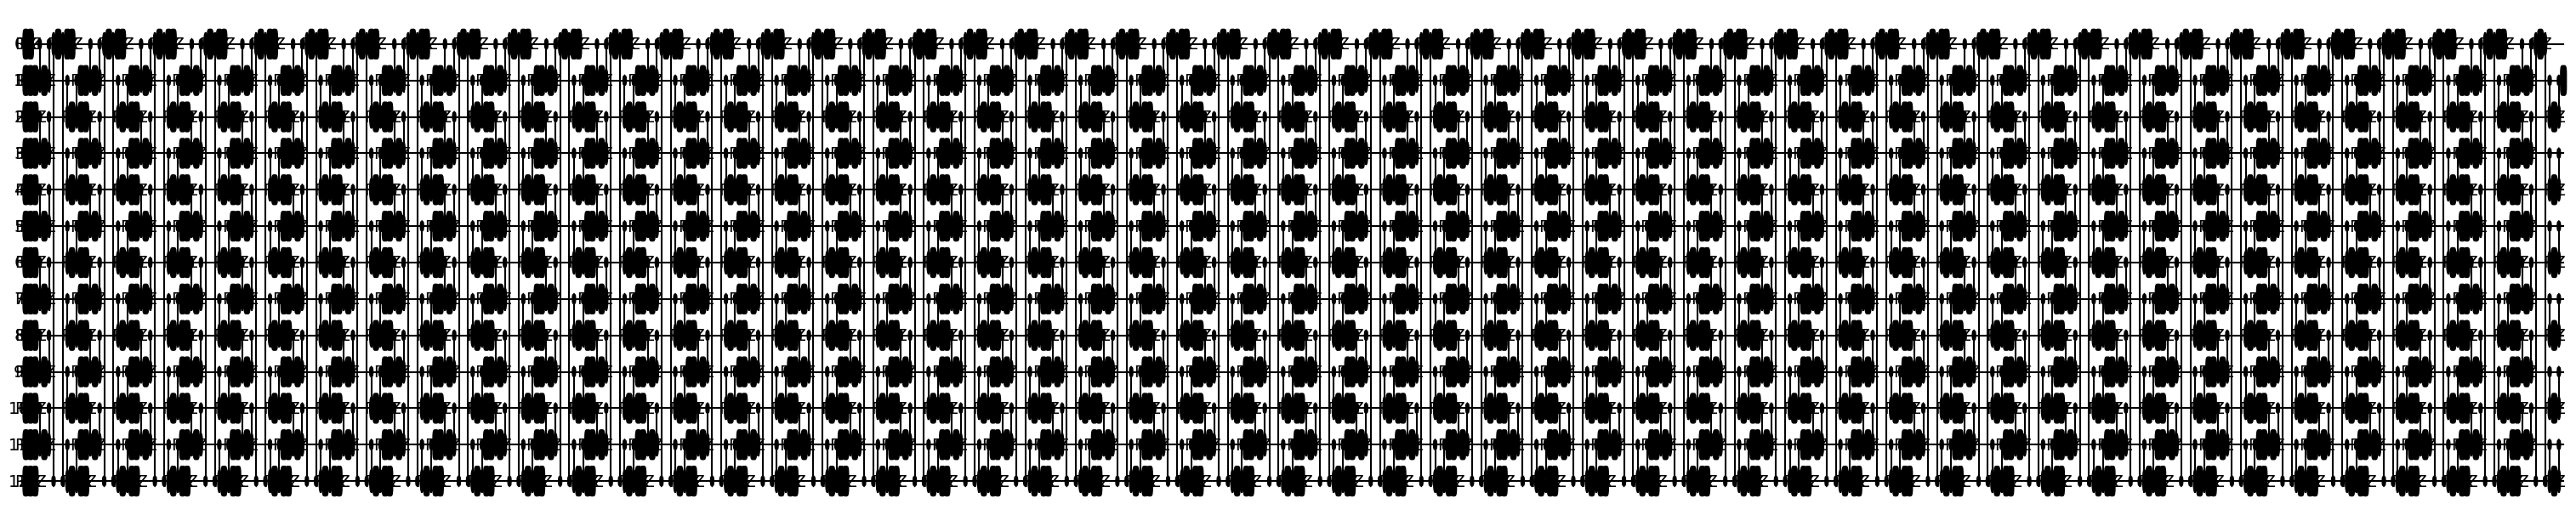

In [16]:
SCORE_PREDICTOR_2.draw_circuit(size=(30, 6))

## Train

In [17]:
SCORE_PREDICTOR_2.set_data(    
    data_X = X[:100], 
    data_Y = Y[:100], 
    # data_validation = data_validation
)

In [31]:
opt = qml.SPSAOptimizer(maxiter=100000, c=0.15, a=0.2)
if isinstance(opt, qml.SPSAOptimizer):
    print('SPSA')

0
1
2
Epoch: 0 | Iter:     1 | Cost: 0.1730896
3
4
Epoch: 0 | Iter:     2
5
6
7
Epoch: 0 | Iter:     3 | Cost: 0.0226220
8
9
Epoch: 0 | Iter:     4
10
11
12
Epoch: 0 | Iter:     5 | Cost: 0.0240077
13
14
Epoch: 0 | Iter:     6
15
16
17
Epoch: 0 | Iter:     7 | Cost: 0.1709777
18
19
Epoch: 0 | Iter:     8
20
21
22
Epoch: 0 | Iter:     9 | Cost: 0.2268489
23
24
Epoch: 0 | Iter:    10
25
26
27
Epoch: 0 | Iter:    11 | Cost: 0.0223369
28
29
Epoch: 0 | Iter:    12
30
31
32
Epoch: 0 | Iter:    13 | Cost: 0.1857318
33
34
Epoch: 0 | Iter:    14
35
36
37
Epoch: 0 | Iter:    15 | Cost: 0.2056354
38
39
Epoch: 0 | Iter:    16
40
41
42
Epoch: 0 | Iter:    17 | Cost: 0.2354443
43
44
Epoch: 0 | Iter:    18
45
46
47
Epoch: 0 | Iter:    19 | Cost: 0.0318070
48
49
Epoch: 0 | Iter:    20
50
51
52
Epoch: 0 | Iter:    21 | Cost: 0.2979561
53
54
Epoch: 0 | Iter:    22
55
56
57
Epoch: 0 | Iter:    23 | Cost: 0.0019932
58
59
Epoch: 0 | Iter:    24
60
61
62
Epoch: 0 | Iter:    25 | Cost: 0.2348264


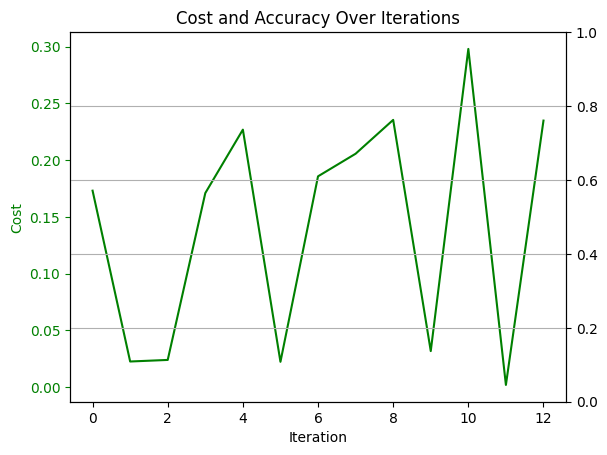

63
64
Epoch: 0 | Iter:    26
65
66
67
Epoch: 0 | Iter:    27 | Cost: 0.0184795
68
69
Epoch: 0 | Iter:    28
70
71
72
Epoch: 0 | Iter:    29 | Cost: 0.0000079
73
74


KeyboardInterrupt: 

In [33]:
SCORE_PREDICTOR_2.train(
    epochs = 1,     
    batch_size = 1,
    optimizer = qml.SPSAOptimizer(A=1, c=0.15, a=0.2),
    cost_every=2,
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 25
    }
)

In [29]:
SCORE_PREDICTOR_2.times

210

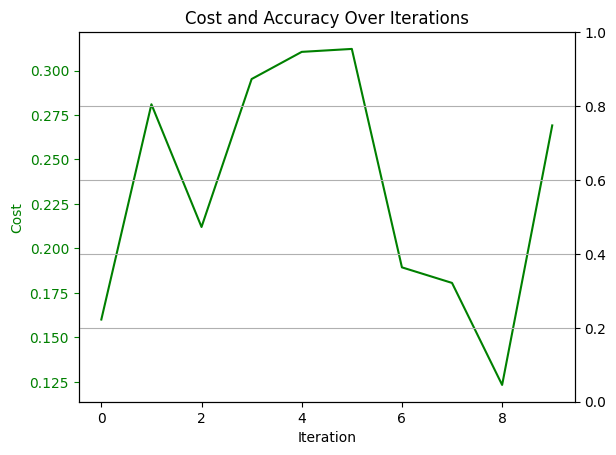

Epoch: 0 | Iter:    10 | Cost: 0.2691609 | Accuracy: 0.7308391 


In [21]:
SCORE_PREDICTOR_2.train(
    epochs = 1,     
    batch_size = 10,
    # optimizer = qml.SPSAOptimizer(maxiter=100000, c=0.15, a=0.2),
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 25
    }
)

In [22]:
SCORE_PREDICTOR_2.times

100

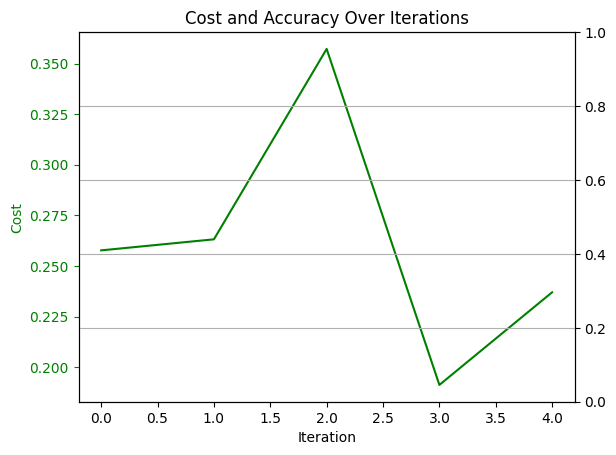

Epoch: 0 | Iter:     5 | Cost: 0.2369665 | Accuracy: 0.7630335 


In [25]:
SCORE_PREDICTOR_2.train(
    epochs = 1,     
    batch_size = 20,
    optimizer = qml.SPSAOptimizer(maxiter=100000, c=0.15, a=0.2),
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 25
    }
)

In [24]:
SCORE_PREDICTOR_2.times

300